In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Methods.costs import * 
from Methods.least_squares import * 
from Methods.ridge import *
from Methods.cross_validation import *
from Methods.split_data import *
from Methods.scaling_standardization import *
from Methods.build_polynomial import *
from Methods.clearDataset import *

%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from Methods.proj1_helpers import *
DATA_TRAIN_PATH = 'csv/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_tra = tX.T

## Do your thing crazy machine learning thing here :) ...

# Raw Data Analysis 

### Visualisation of the data

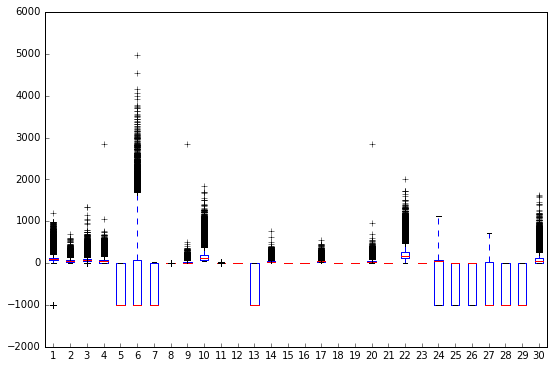

In [3]:
#Boxplot of the Raw Data
boxplot(tX, -2000, 6000, 'boxplot_original')

## Scatter plots

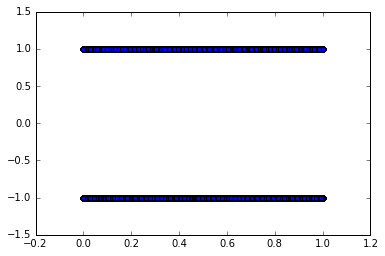

In [4]:
res = np.column_stack((y, tX[:,12])) # Change with tX[:,i] to plot y against the ith col of tX
res_filt = res[res[:,1] != -999]
plt.scatter(res_filt[:,1], res_filt[:,0])
plt.show()

## Correlations (not useful?)

In [5]:
for i,col in zip(range(tX.T.shape[0]),tX.T):
    vec = np.column_stack((y,col))
    #vec_filtered = vec[vec[:,1] > -998]
    #print(i, np.corrcoef(vec.T)[0,1])

0 0.239149057892
1 -0.351427955862
2 -0.0140552737849
3 0.192526328569
4 0.141645992566
5 0.191766088075
6 0.140554400465
7 0.0122454812855
8 -0.0152874266878
9 0.153235932476
10 -0.195397896183
11 0.271751877052
12 0.141345988596
13 0.235237975878
14 -0.000943251058212
15 -0.00440253868639
16 -0.0319475868053
17 0.00151623537706
18 0.00412544741152
19 0.0224657515108
20 0.00747534218859
21 0.135520261523
22 0.133549123082
23 0.157604145676
24 0.15046926005
25 0.150468037793
26 0.14071436695
27 0.141264913776
28 0.141255686505
29 0.134295726669


# Feature Processing

## Data scaling 

In [6]:
minima_tX = data_scaling(tX.T)

##### Boxplot of the scale data

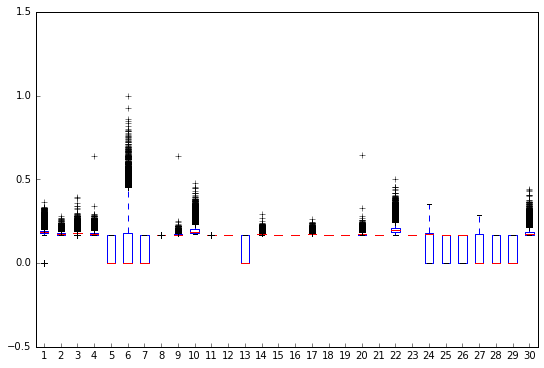

In [7]:
boxplot(minima_tX, -0.5, 1.5, 'boxplot_scaled')

## Data standardization

In [47]:
std_tX = data_standardization(tX.T)

##### Boxplot of the Standardized data

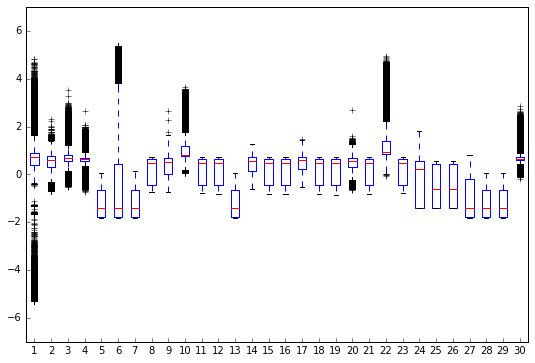

In [9]:
boxplot(std_tX, -7, 7, 'boxplot_standardized')

## Feature Deletion

In [34]:
PERCENT_FACTOR = 0.5
dele_tX_temp = deleteNoneWantedData(tX, PERCENT_FACTOR)
np_dele_tX_temp = np.array(dele_tX_temp)

conc = np.column_stack((y, np_dele_tX_temp))
conc_filtered = conc[~(conc == -999).any(1)]
y_cleaned = conc_filtered[:,0]
tX_cleaned = conc_filtered[:,1:]
#y_tX_temp = np.append(np.array([y]).T, dele_tX_temp, axis=1)
#dele_tX = deleteUnwantedLine(dele_tX_temp)

In [28]:
#dele_tX_temp[:10]
import sys
#print(y_cleaned.shape)
#print(tX_cleaned.shape)
corr_mat = np.corrcoef(rem_mean_tX.T)
rem_mean_tX = np.delete(mean_tX, [2, 3, 4, 5, 6, 7, 9, 16, 21, 22, 23, 29], 1)
np.savetxt(sys.stdout, corr_mat, '%5.2f')

 1.00  0.18  0.01  0.07  0.02 -0.02  0.25  0.00 -0.00  0.00 -0.00  0.09 -0.00  0.00  0.01 -0.01  0.00 -0.00
 0.18  1.00  0.02  0.35 -0.42 -0.06 -0.15 -0.00  0.00 -0.01  0.00  0.18 -0.02  0.00  0.01 -0.02  0.00  0.00
 0.01  0.02  1.00  0.04  0.18 -0.09  0.10  0.00  0.00  0.01 -0.00  0.27  0.00 -0.01  0.00  0.23  0.00 -0.00
 0.07  0.35  0.04  1.00 -0.04 -0.04 -0.47  0.00  0.00  0.00 -0.01  0.05 -0.00  0.00 -0.00  0.03  0.00  0.00
 0.02 -0.42  0.18 -0.04  1.00  0.05  0.14  0.01 -0.00  0.01  0.00  0.18  0.01  0.00  0.00  0.04 -0.00 -0.01
-0.02 -0.06 -0.09 -0.04  0.05  1.00  0.03 -0.00 -0.00 -0.00  0.00 -0.01  0.00  0.00 -0.00 -0.03  0.00 -0.00
 0.25 -0.15  0.10 -0.47  0.14  0.03  1.00 -0.00  0.00  0.00  0.00  0.18  0.00  0.00  0.00  0.10 -0.00 -0.00
 0.00 -0.00  0.00  0.00  0.01 -0.00 -0.00  1.00 -0.00  0.56  0.00  0.00  0.00  0.16 -0.00 -0.00  0.08  0.00
-0.00  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00  1.00 -0.00 -0.21  0.01  0.03  0.00 -0.14  0.00  0.00 -0.06
 0.00 -0.01  0.01  0.00  0.0

## Replace Undefined variables by mean of all the other variables

In [3]:
mean_tX = np.array(averageData(tX))
mean_std_tX = data_standardization(mean_tX.T)

In [59]:
tX[1]

array([  1.60937000e+02,   6.87680000e+01,   1.03235000e+02,
         4.81460000e+01,   2.40373503e+00,   3.71783360e+02,
        -8.21688171e-01,   3.47300000e+00,   2.07800000e+00,
         1.25157000e+02,   8.79000000e-01,   1.41400000e+00,
         4.58289801e-01,   4.20140000e+01,   2.03900000e+00,
        -3.01100000e+00,   3.69180000e+01,   5.01000000e-01,
         1.03000000e-01,   4.47040000e+01,  -1.91600000e+00,
         1.64546000e+02,   1.00000000e+00,   4.62260000e+01,
         7.25000000e-01,   1.15800000e+00,   5.76794744e+01,
        -1.18452642e-02,  -1.58228913e-03,   4.62260000e+01])

## Polynomial Transformation

### Polynome

array([[  1.,   2.,   4.,   3.,   9.,   4.,  16.],
       [  1.,   1.,   1.,   2.,   4.,   3.,   9.],
       [  1.,   3.,   9.,   2.,   4.,   1.,   1.]])

### Squared

In [56]:
tx_squares = build_poly_matrix(mean_std_tX, 2)

### Sqrt

## Other Transformations

### Log

### Suppress some col

In [81]:
mean_sup = np.delete(mean_tX, [2, 4, 29], 1)
print(mean_sup.shape)

(250000, 27)


## Model Selection

### Least Squares

In [38]:
def compute_vif(X):
    VIF = []
    for j in range(X.shape[1]):
        col = X[:, j]
        inv_mat = np.linalg.inv(np.dot(X.T, X))
        vif_j = np.dot(col.T, col) * inv_mat[j, j]
        VIF.append(vif_j)
    return VIF

In [59]:
mse, weights = least_squares(y, build_poly_matrix(rem_mean_tX, 3))
print(np.sqrt(2*mse))
mse_m, w_m = least_squares(y, np.delete(mean_tX, [4, 9, 13, 29], 1))
print(compute_vif(rem_mean_tX))
remove_tX = np.delete(mean_tX, [4, 9, 13, 29], 1)
r_mse, w_r = least_squares(y, remove_tX)
print(r_mse)

0.798478582765
[6.8214276902796485, 4.6381643846943001, 1.9874821795447788, 5.2450657818580542, 1.4150012781877503, 4.5781535506997777, 5.4643536462810269, 1.4636678648743189, 1.0964318031055509, 1.473769315550594, 1.1360009784568268, 3.2901651437327275, 1.0621686870085201, 1.0738675015142227, 1.1628592078853917, 9.2706024129675715, 1.0426277923453218, 1.0244605190387874]
0.351869823451


### Ridge Regression

In [65]:
w_ridge = ridge_regression(y,  build_poly_matrix(mean_tX, 3), 10**(-6))
print(w_ridge)

[ -2.68489509e+00   1.23347086e-02  -4.08835478e-05   3.23476188e-08
  -1.19987973e-02   5.94380335e-05  -6.50137066e-08  -1.34004142e-02
   2.60430341e-05  -1.54216623e-08   1.27383526e-03   7.58983407e-06
  -8.78002029e-09  -3.90942815e-01   1.48459790e-01  -1.75508971e-02
  -9.93356429e-04   6.55281470e-07  -1.23787426e-10  -6.32916585e-02
   2.73097194e-03  -1.27386364e-04   1.62920434e+00  -4.82037291e-01
   5.59399165e-02  -1.50104848e-03   9.11723617e-06   2.18134015e-08
  -6.79223788e-02  -1.79231141e-06   1.81003125e-09  -4.16330707e-01
   6.69212200e-02  -2.87435024e-03  -8.11156912e-02   2.97367209e-02
   6.84254905e-02  -3.41341768e-01   1.34647635e+00  -6.94415404e-01
   8.48693464e-02  -8.11474815e-05   9.28452415e-08  -2.01890535e-03
  -2.28621911e-02   3.47932533e-04  -4.02777339e-05  -4.14430393e-04
   2.44108751e-06   8.78656850e-02  -9.43467539e-05   1.34243940e-07
   1.24866049e-03  -3.46675480e-02  -5.91280410e-04   2.92084003e-03
  -9.04998403e-05  -4.11836573e-04

### Least squares Gradient Descent

### Least squares Stochastique Gradient Descent

### Logistic regression (does not work)

In [52]:
from Methods.logistic import *
y_binary = np.copy(y)
y_binary[y_binary == -1] = 0
std_tX_temp = data_standardization(rem_mean_tX.T)
#m, w = least_squares(y_binary, mean_std_tX)
w_log = logistic_regression_gradient_descent_demo(y_binary[:125000], build_poly_matrix(mean_std_tX[:125000],3), batch_size=10000)

91 (91, 1)
Current iteration=0, the loss=0.6931471805600546
Current iteration=10, the loss=0.5560605023551506
Current iteration=20, the loss=0.502523304316183
Current iteration=30, the loss=0.7231742339685443
Current iteration=40, the loss=0.5524834673901913
Current iteration=50, the loss=0.49461812820321566
Current iteration=60, the loss=0.4659319931808204
Current iteration=70, the loss=0.45823318755528425
Current iteration=80, the loss=0.4428149486003682
Current iteration=90, the loss=0.4458923879503216
Current iteration=100, the loss=0.4389236750754743
Current iteration=110, the loss=0.4351315857153093
Current iteration=120, the loss=0.44030476735544033
Current iteration=130, the loss=0.43354694309461683
Current iteration=140, the loss=0.4484331003394187
Current iteration=150, the loss=0.4449329287388712
Current iteration=160, the loss=0.4384573790342013
Current iteration=170, the loss=0.44331182348160064
Current iteration=180, the loss=0.44011917593005884
Current iteration=190, the

### Reg logistic regression

250000

In [54]:
vect = sigmoid(np.dot( build_poly_matrix(mean_std_tX[-250000:],3), w_log))
vect[vect >= 0.5] = 1
vect[vect < 0.5] = -1
e_log = y[-250000:] - vect[:,0]
np.sqrt(2*calculate_mse(e_log))

0.91451407862317791

## Verification

### Cross Validation

In [43]:
#remove_tX = np.delete(mean_tX, [9], 1)
rem_squ_tX = build_poly_matrix(rem_mean_tX, 2)

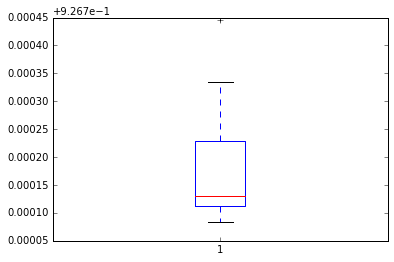

[0.92714615891994079, 0.92703397995974235, 0.92694767921388099, 0.92683547623081408, 0.92678368565701463, 0.9268095813056747, 0.92679231762029612, 0.92681821302777601, 0.92682684466948839, 0.92687000167229494]


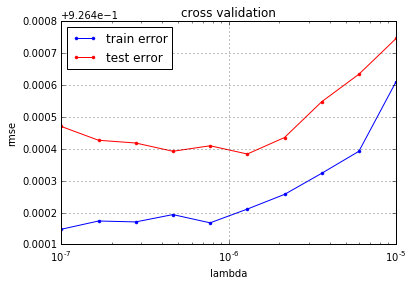

In [64]:
#Data split for the tests
#x_tr, y_tr, x_te, y_te = split_data(tX, y, 0.4)

cross_validation_demo(y, build_poly_matrix(mean_tX, 3))


###  Bias-Variance decomposition

### Binary Classification

In [ ]:
#Use predict_labels de project helpers (fait la multiplication entre tX et les w)

## Generate predictions and save ouput in csv format for submission:

In [66]:
DATA_TEST_PATH = 'csv/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [67]:
mean_tX_test = np.array(averageData(tX_test))

In [68]:
tX_test_squares = build_poly_matrix(mean_tX_test, 3)

In [69]:
OUTPUT_PATH = 'csv/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w_ridge, tX_test_squares)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)